In [189]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
import pandas as pd

In [7]:
def walk1D(scale=1.0, steps=1000, drift=0.0):
    x = np.cumsum(np.random.normal(loc=drift, scale=scale, size=steps))
    return x

In [42]:
def walk2D(scale=(1.0, 1.0), steps=1000, drift=(0.0, 0.0), theta=0):
    theta = np.radians(theta)
    rMatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    x = np.cumsum(np.random.normal(loc=drift[0], scale=scale[0], size=steps)).reshape((1, steps))
    y = np.cumsum(np.random.normal(loc=drift[1], scale=scale[1], size=steps)).reshape((1, steps))
    x = np.concatenate((x, y), axis=0)

    x = np.matmul(rMatrix, x)
    x, y = x[0, :], x[1, :]
    return x, y

In [57]:
def walks1D(scale=1.0, steps=1000, drift=0.0, N=10):
    x = np.cumsum(np.random.normal(loc=drift, scale=scale, size=(steps, N)), axis=0)
    return x

In [165]:
def walks2D(scale=(1.0, 1.0), steps=1000, drift=(0.0, 0.0), theta=0, N=10, masked=False):
    theta = np.radians(theta)
    rMatrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    x = np.cumsum(np.random.normal(loc=drift[0], scale=scale[0], size=(steps, N)), axis=0).reshape((steps, 1, N))
    y = np.cumsum(np.random.normal(loc=drift[1], scale=scale[1], size=(steps, N)), axis=0).reshape((steps, 1, N))
    x = np.concatenate((x, y), axis=1)

    x = np.matmul(rMatrix, x)
    x, y = x[:, 0, :], x[:, 1, :]
    
    if masked:
        xi, yi = np.meshgrid(np.arange(0, N), np.arange(0, steps))
        ind = np.random.randint(int(0.75*steps), steps, size=(1, N))
        ind = np.tile(ind, reps=(steps, 1))
        mask = ind < yi
        x, y = ma.array(x, mask=mask), ma.array(y, mask=mask)
        
    return x, y

In [177]:
x, y = walks2D(theta=60, scale=(3.0, 1.0), drift=(0.25, 0.0), masked=True)

In [178]:
xi.shape

(1000, 10)

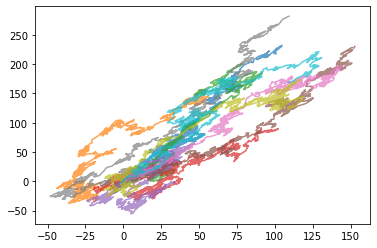

In [179]:
for i in range(10):
    plt.plot(x[:, i], y[:, i], alpha=0.7)

In [227]:
def trajStack(x, y):
    steps, N = x.shape
    xi, yi = np.meshgrid(np.arange(0, N), np.arange(0, steps))
    
    tStack = pd.DataFrame({'Number': xi.flatten(order='F'),
                           'Frame': yi.flatten(order='F'),
                           'x': x.flatten(order='F'),
                           'y': y.flatten(order='F')})
    tStack = tStack.set_index(['Number', 'Frame'])
    
    return tStack

In [239]:
def trajUnstack(data):
    x = data.unstack(level=0)['x'].to_numpy()
    y = data.unstack(level=0)['y'].to_numpy()
    
    return x, y

In [ ]:
data = trajStack(x, y)

In [238]:
data.unstack(level=0)['x'].to_numpy().shape

(1000, 10)

In [232]:
x.shape

(1000, 10)